In [1]:
import pandas as pd
import networkx as nx
import collections
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df_reembolso_resumo = pd.read_csv("/home/gustavo/Downloads/Redes/Tabelas_Gerada/reembolso_resumo.csv", delimiter=',')

In [3]:
df_reembolso_resumo

,partido,uf,num_agente_politico,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo
0,AVANTE,AL,74558.0,A.B.LESSA NETO & CIA LTDA.,055.625.890/0013-5,208.28,1,sem_info
1,AVANTE,AL,74558.0,AAMM COMERCIO DE COMBUSTIVEIS LTDA,091.649.510/0017-0,200.00,1,sem_info
2,AVANTE,AL,74558.0,ADILZA S. F. RAMOS,013.329.220/0016-9,960.01,2,sem_info
3,AVANTE,AL,74558.0,ALEX SANDRO DOS SANTOS ME,107.826.560/0016-7,144000.00,2,sem_info
4,AVANTE,AL,74558.0,ALIANCA COMERCIO E DISTRIBUICAO DE COMBUSTIVEI...,023.798.690/0054-8,748.41,3,sem_info
5,AVANTE,AL,74558.0,ALIANÇA COMERCIO E DIST DE COMBUSTIVEIS LTDA,023.798.690/0011-4,355.05,2,sem_info
6,AVANTE,AL,74558.0,ALMIR E SILVA LTDA,049.791.690/0019-6,10467.50,42,sem_info
7,AVANTE,AL,74558.0,ALMIR E SILVA LTDA - EPP,049.791.690/0019-6,10173.83,42,sem_info
8,AVANTE,AL,74558.0,ALMIR E SILVA LTDA - EPP,049.791.690/0019-6,52063.06,172,sem_info
9,AVANTE,AL,74558.0,ALMIR E SILVA LTDA EPP,049.791.690/0019-6,138252.54,424,sem_info


In [4]:
#df_reembolso_resumo = df_reembolso_resumo[df_reembolso_resumo.nome_completo != 'sem_info']
print(df_reembolso_resumo['soma_valor_reembolso'].sum())
print(df_reembolso_resumo['soma_valor_reembolso'].count())

873859541.69
210570


In [5]:
df = df_reembolso_resumo[df_reembolso_resumo.cnpj_cpf_empresa.apply(lambda x: len(str(x)) != 11)]
df = df[df.soma_valor_reembolso > 4149]
df = df[df.qtde_reembolsos > 6]
df = df[df.nome_completo != 'sem_info']
df['peso'] = (df['soma_valor_reembolso'].apply(lambda x: round(np.log(x), 3))) + df['qtde_reembolsos'].apply(lambda x: round(np.log(x), 3)) 

In [6]:
df

,partido,uf,num_agente_politico,fornecedor,cnpj_cpf_empresa,soma_valor_reembolso,qtde_reembolsos,nome_completo,peso
1172,AVANTE,MG,160510.0,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0311-2,4643.90,35,LUIS HENRIQUE DE OLIVEIRA RESENDE,11.998
1195,AVANTE,MG,160510.0,CELULAR FUNCIONAL,000.000.000/0000-1,21589.00,119,LUIS HENRIQUE DE OLIVEIRA RESENDE,14.759
1206,AVANTE,MG,160510.0,CONDOMINIO DO EDIFICIO MARBLE ARCH,387.322.850/0012-8,17782.95,11,LUIS HENRIQUE DE OLIVEIRA RESENDE,12.184
1207,AVANTE,MG,160510.0,CONDOMÍNIO ED. MARBLE ARC,387.322.850/0012-8,45517.18,30,LUIS HENRIQUE DE OLIVEIRA RESENDE,14.127
1240,AVANTE,MG,160510.0,Cia Aérea - AZUL,092.962.950/0016-0,194897.22,326,LUIS HENRIQUE DE OLIVEIRA RESENDE,17.967
1241,AVANTE,MG,160510.0,Cia Aérea - AZUL,092.962.950/0016-0,67323.68,104,LUIS HENRIQUE DE OLIVEIRA RESENDE,15.761
1242,AVANTE,MG,160510.0,Cia Aérea - GOL,075.756.510/0015-9,75436.44,384,LUIS HENRIQUE DE OLIVEIRA RESENDE,17.182
1243,AVANTE,MG,160510.0,Cia Aérea - GOL,075.756.510/0015-9,20600.51,40,LUIS HENRIQUE DE OLIVEIRA RESENDE,13.622
1246,AVANTE,MG,160510.0,Cia Aérea - TAM,020.128.620/0016-0,115750.50,219,LUIS HENRIQUE DE OLIVEIRA RESENDE,17.048
1247,AVANTE,MG,160510.0,Cia Aérea - TAM,020.128.620/0016-0,20745.51,35,LUIS HENRIQUE DE OLIVEIRA RESENDE,13.495


In [7]:
df['qtde_reembolsos'].describe()

count    6082.000000
mean       61.284446
std        97.455140
min         7.000000
25%        12.000000
50%        26.000000
75%        63.000000
max      1414.000000
Name: qtde_reembolsos, dtype: float64

In [27]:
G = nx.Graph()
G.add_nodes_from(df['cnpj_cpf_empresa'], bipartite = 1)
empresa = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_nodes_from(df['nome_completo'], bipartite=0)
deputado = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]

G.add_weighted_edges_from(df[['cnpj_cpf_empresa', 'nome_completo','peso']].values)
                                         
edge_width = [a[2]['weight']/10 for a in G.edges(data=True)]
'''
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color='#bfbf7f', node_shape="h", node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color='#9f9fff', node_size=30)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.2)
plt.title('Empresas reembolsadas')
plt.axis('off')
plt.savefig('/home/gustavo/Downloads/Redes/Grafos/Empresas_reembolsadas.png')
plt.show()
'''

'\nplt.figure(figsize=(20,20))\npos = nx.kamada_kawai_layout(G)\n\nnx.draw_networkx_nodes(G, pos, nodelist = deputado, node_color=\'#bfbf7f\', node_shape="h", node_size=30)\nnx.draw_networkx_nodes(G, pos, nodelist = empresa, node_color=\'#9f9fff\', node_size=30)\nnx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.2)\nplt.title(\'Empresas reembolsadas\')\nplt.axis(\'off\')\nplt.savefig(\'/home/gustavo/Downloads/Redes/Grafos/Empresas_reembolsadas.png\')\nplt.show()\n'

In [28]:
df['cnpj_cpf_empresa'].nunique()

2817

In [29]:
df['nome_completo'].nunique()

245

In [30]:
G.number_of_nodes()

3062

In [31]:
G.number_of_edges()

5636

In [32]:
nx.density(G)

0.0012026311931718887

In [33]:
#Distribuição de grau
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

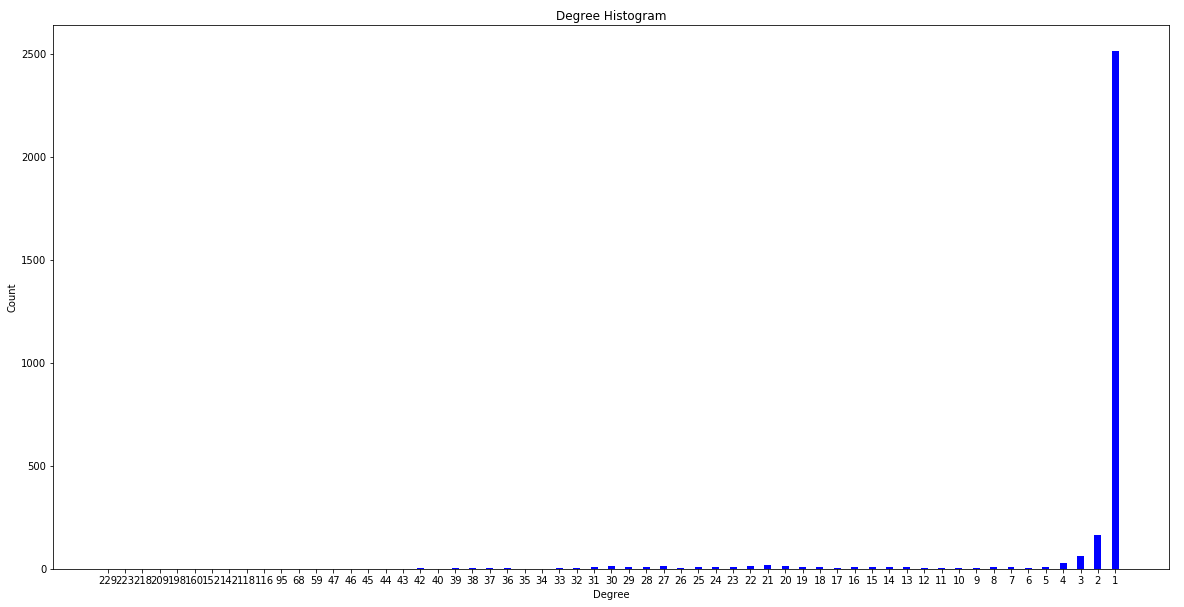

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(range(len(deg)), cnt, width=0.40, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks(range(len(deg)))
ax.set_xticklabels(deg)
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
plt.axis('off')
'''
nx.draw_networkx_nodes(G, pos = nx.kamada_kawai_layout(G), node_size=20, node_color=colors)
nx.draw_networkx_edges(G, pos = nx.kamada_kawai_layout(G), alpha=0.4)
'''
plt.show()

In [35]:
import operator
dic = dict(nx.degree_centrality(G))
dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)
dict(dic)

{'020.128.620/0016-0': 0.07481215289121201,
 '075.756.510/0015-9': 0.07285200914733747,
 '020.128.620/0016-0 ': 0.07121855602744201,
 '075.756.510/0015-9 ': 0.06827834041163018,
 '000.000.000/0000-6': 0.06468474354786018,
 '025.758.290/0014-8': 0.05227049983665469,
 '092.962.950/0016-0': 0.049656974844821955,
 '000.000.000/0000-1': 0.04639006860503103,
 '025.758.290/0014-8 ': 0.03854949362953283,
 '000.000.000/0000-7': 0.03789611238157465,
 '092.962.950/0016-0 ': 0.03103560927801372,
 '000.000.000/0000-1 ': 0.02221496243057824,
 '025.581.570/0016-2': 0.019274746814766416,
 'FRANCISCO TADEU BARBOSA DE ALENCAR': 0.015354459327017313,
 'WALDENOR ALVES PEREIRA FILHO': 0.015027768703038222,
 'HUGO LEAL MELO DA SILVA': 0.01470107807905913,
 'VANDERLEI MACRIS': 0.014374387455080039,
 'CELSO MALDANER': 0.014047696831100947,
 'ANTONIO WANDSCHEER': 0.013721006207121855,
 'MARIA MARGARIDA MARTINS SALOMAO': 0.013721006207121855,
 'VITOR LIPPI': 0.013067624959163672,
 'ALAN RICK MIRANDA': 0.0127409

In [36]:
nx.density(G)

0.0012026311931718887

In [37]:
nx.clustering(G)

{'003.065.970/0311-2': 0,
 '000.000.000/0000-1': 0,
 '387.322.850/0012-8 ': 0,
 '387.322.850/0012-8': 0,
 '092.962.950/0016-0': 0,
 '092.962.950/0016-0 ': 0,
 '075.756.510/0015-9': 0,
 '075.756.510/0015-9 ': 0,
 '020.128.620/0016-0': 0,
 '020.128.620/0016-0 ': 0,
 '663.544.570/0010-2': 0,
 '088.840.380/0018-6': 0,
 '126.097.330/0010-7 ': 0,
 '126.097.330/0010-7': 0,
 '187.153.830/0014-0 ': 0,
 '174.037.420/0016-0': 0,
 '166.314.180/0013-7': 0,
 '187.153.830/0014-0': 0,
 '000.000.000/0000-6': 0,
 '025.581.570/0016-2': 0,
 '025.581.570/0016-2 ': 0,
 '192.247.400/0013-0 ': 0,
 '055.480.550/0015-4': 0,
 '055.480.550/0015-4 ': 0,
 '404.325.440/1029-0': 0,
 '081.493.470/0010-2': 0,
 '000.000.000/0000-7': 0,
 '000.000.000/0000-7 ': 0,
 '025.758.290/0014-8': 0,
 '404.325.440/1029-0 ': 0,
 '715.267.734/49  -': 0,
 '000.094.234/00  -  ': 0,
 '193.440.810/0017-5': 0,
 '155.134.170/0012-5': 0,
 '085.431.490/0012-9': 0,
 '171.727.360/0014-0': 0,
 '117.230.210/0015-1 ': 0,
 '117.230.210/0015-1': 0,
